## 2. Preprocessing and Modelling

## Contents

- [EDA](#EDA)
- [Preprocessing](#Preprocessing)
- [Modelling](#Modelling)

# EDA

In [1]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words
from nltk.stem.porter import PorterStemmer

from bs4 import BeautifulSoup 

import datetime as dt

import numpy as np
import pandas as pd
import scipy.stats as stats

from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words

# Import Tokenizer
from nltk.tokenize import RegexpTokenizer

# Import Regular Expressions
import regex as re

from sklearn.naive_bayes import MultinomialNB, GaussianNB

# Import model.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

from nltk.corpus import stopwords


%matplotlib inline



In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('../Data/df_TX_WI_clean.csv')
df.head()

,Unnamed: 0,Date,Favorites,HashTags,Mentions,Retweets,Text,location,target,user_split,user_text
0,0,2019-07-19 22:40:31+00:00,0,#Respect,@BBCWorld @BigCatRescue,1,Nice to have a positive story about big cats f...,WI,0,Gabriettaa,Gabriettaa Nice to have a positive story about...
1,1,2019-07-19 22:26:34+00:00,0,None,None,0,my dad just told me to flood my car so I can g...,WI,1,chaaasiti04,chaaasiti04 my dad just told me to flood my ca...
2,2,2019-07-19 22:19:05+00:00,1,None,None,2,"Happy B-day Reggie, from the office!!!",WI,1,JDenius,"JDenius Happy B-day Reggie, from the office!!!"
3,3,2019-07-19 22:17:13+00:00,0,None,None,0,Something about how crime will magically drop ...,WI,1,beganovic2021,beganovic2021 Something about how crime will m...
4,4,2019-07-19 20:57:18+00:00,0,None,None,0,Lol mine too. I’ve been avoiding floods for th...,WI,1,RiskItAllRichy,RiskItAllRichy Lol mine too. I’ve been avoidin...


In [5]:
# drop 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace = True)

In [6]:
df.head()

,Date,Favorites,HashTags,Mentions,Retweets,Text,location,target,user_split,user_text
0,2019-07-19 22:40:31+00:00,0,#Respect,@BBCWorld @BigCatRescue,1,Nice to have a positive story about big cats f...,WI,0,Gabriettaa,Gabriettaa Nice to have a positive story about...
1,2019-07-19 22:26:34+00:00,0,None,None,0,my dad just told me to flood my car so I can g...,WI,1,chaaasiti04,chaaasiti04 my dad just told me to flood my ca...
2,2019-07-19 22:19:05+00:00,1,None,None,2,"Happy B-day Reggie, from the office!!!",WI,1,JDenius,"JDenius Happy B-day Reggie, from the office!!!"
3,2019-07-19 22:17:13+00:00,0,None,None,0,Something about how crime will magically drop ...,WI,1,beganovic2021,beganovic2021 Something about how crime will m...
4,2019-07-19 20:57:18+00:00,0,None,None,0,Lol mine too. I’ve been avoiding floods for th...,WI,1,RiskItAllRichy,RiskItAllRichy Lol mine too. I’ve been avoidin...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 10 columns):
Date          2702 non-null object
Favorites     2702 non-null int64
HashTags      2702 non-null object
Mentions      2702 non-null object
Retweets      2702 non-null int64
Text          2702 non-null object
location      2702 non-null object
target        2702 non-null int64
user_split    2702 non-null object
user_text     2702 non-null object
dtypes: int64(3), object(7)
memory usage: 211.2+ KB


In [8]:
df['user_text']

0       Gabriettaa Nice to have a positive story about...
1       chaaasiti04 my dad just told me to flood my ca...
2          JDenius Happy B-day Reggie, from the office!!!
3       beganovic2021 Something about how crime will m...
4       RiskItAllRichy Lol mine too. I’ve been avoidin...
                              ...                        
2697    CharlotteCP Flash flood watch for Charlotte an...
2698    NWSTallahassee  Move to higher ground! Flash F...
2699    BLifeAldine Help arrives for Greenspoint flood...
2700    Futureteller W my fellow Capital Correspondent...
2701    ClayDix Flood party @Charleston, South Carolin...
Name: user_text, Length: 2702, dtype: object

## Preprocessing

In [9]:
# adapted from our NLP Lecture 5.03
def text_to_words(text):
    
    # 1. Remove HTML.
    review_text = BeautifulSoup(text).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stopwords to a set.
    stops = set(stopwords.words('english'))
    
    # 5. Remove stopwords.
    meaningful_words = [w for w in words if w not in stops]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [10]:
def stemmed_words(text):
    # Instantiate tokenizer.
    tokenizer = RegexpTokenizer(r'\w+')
    # Tokenize text.
    tokens = tokenizer.tokenize(text.lower())
    # Instantiate stemmer.
    p_stemmer = PorterStemmer()
    # Stem words.
    stemmed_words = [p_stemmer.stem(word) for word in tokens]
    return stemmed_words

In [11]:
df['adj_text'] = [text_to_words(row) for row in df['Text']] 

In [12]:
df['adj_text_stem'] = [' '.join(stemmed_words(row)) for row in df['adj_text']]

In [13]:
df.head()

,Date,Favorites,HashTags,Mentions,Retweets,Text,location,target,user_split,user_text,adj_text,adj_text_stem
0,2019-07-19 22:40:31+00:00,0,#Respect,@BBCWorld @BigCatRescue,1,Nice to have a positive story about big cats f...,WI,0,Gabriettaa,Gabriettaa Nice to have a positive story about...,nice positive story big cats change respect in...,nice posit stori big cat chang respect india f...
1,2019-07-19 22:26:34+00:00,0,None,None,0,my dad just told me to flood my car so I can g...,WI,1,chaaasiti04,chaaasiti04 my dad just told me to flood my ca...,dad told flood car get new one alright bet,dad told flood car get new one alright bet
2,2019-07-19 22:19:05+00:00,1,None,None,2,"Happy B-day Reggie, from the office!!!",WI,1,JDenius,"JDenius Happy B-day Reggie, from the office!!!",happy b day reggie office,happi b day reggi offic
3,2019-07-19 22:17:13+00:00,0,None,None,0,Something about how crime will magically drop ...,WI,1,beganovic2021,beganovic2021 Something about how crime will m...,something crime magically drop plant things va...,someth crime magic drop plant thing vacant lot
4,2019-07-19 20:57:18+00:00,0,None,None,0,Lol mine too. I’ve been avoiding floods for th...,WI,1,RiskItAllRichy,RiskItAllRichy Lol mine too. I’ve been avoidin...,lol mine avoiding floods simple fact ima addic...,lol mine avoid flood simpl fact ima addict go ...


## Modeling

In [43]:
X = df['adj_text_stem']
y = df['target']

In [44]:
X.shape

(2702,)

In [45]:
y.shape

(2702,)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state=42)

In [47]:
X_train.shape

(1891,)

In [48]:
y_train.shape

(1891,)

In [49]:
def grid_search(vectorizer, model):
    pipe = Pipeline([('vec', vectorizer), 
                        ('model', model)])
    pipe_params = {
        "vec__max_features": [250, 500, 750, 1000, 1500, 2000],
        "vec__ngram_range": [(1,1),(1,2), (1,3)],
        "vec__stop_words": ['english', None]
    }
    grid_search = GridSearchCV(pipe, # what object are we optimizing?
                  pipe_params,
                scoring= 'accuracy',# what parameters values are we searching?
                  cv=5)
    grid_search.fit(X_train, y_train)  
    model= grid_search.best_estimator_
    preds = model.predict(X_test) 
    tn, fp, fn, tp = confusion_matrix(y_test,
                                  preds).ravel()
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    sens = tp/(fn+tp)
    spec = tn/(tn+fp)
    fpr = 1-(spec)
    acc = (tp+tn)/(tn+tp+fp+fn)
    misclass = 1-(acc)
    return train_score, test_score, sens, spec, fpr, acc, misclass

In [50]:
def multi_pipe(vectorizers, models):
    vect = []
    mod = []
    train_score = []
    test_score = []
    sens = []
    spec = []
    fpr = []
    acc = []
    ROC_AUC = []
    misclass = []
    for vectorizer in vectorizers:
        for model in models:
            pipe = Pipeline([('vec', vectorizer), 
                        ('model', model)])
            pipe_params = {
                "vec__max_features": [250, 500, 750, 1000, 1500, 2000],
                "vec__ngram_range": [(1,1),(1,2), (1,3)],
                "vec__stop_words": ['english', None]
            }
            grid_search = GridSearchCV(pipe, # what object are we optimizing?
                          pipe_params,
                        scoring= 'accuracy',# what parameters values are we searching?
                          cv=5)
            grid_search.fit(X_train, y_train)  
            model= grid_search.best_estimator_
            
            # Model training and test scores
            train_score.append(round(model.score(X_train, y_train), 3))
            test_score.append(round(model.score(X_test, y_test), 3))
            
            # Metric Calculations
            preds = model.predict(X_test) 
            tn, fp, fn, tp = confusion_matrix(y_test,
                                          preds).ravel()
            sens.append(round(tp/(fn+tp), 3))
            spec.append(round(tn/(tn+fp), 3))
            fpr.append(round(1-(tn/(tn+fp)), 3))
            acc.append(round((tp+tn)/(tn+tp+fp+fn), 3))
            misclass.append(round(1-((tp+tn)/(tn+tp+fp+fn)), 3)) 
            
            #ROC AUC Calculations
            pred_proba = [i[1] for i in model.predict_proba(X_test)]
            pred_df = pd.DataFrame(data = {'true_values': y_test,'pred_probs':pred_proba})
            ROC_AUC.append(round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]), 3))
            
            vect.append(vectorizer)
            mod.append(model)
            
    results = pd.DataFrame({'Model': mod,
                            'Vectorizer': vect,
                            'Training Score': train_score,
                            'Testing Score': test_score,
                            'Sensitivity': sens,
                            'Specificity': spec,
                            'False Positive Rate': fpr,
                            'Accuracy': acc,
                            'Misclassification Rate': misclass,
                           'ROC AUC Score': ROC_AUC})
    return results

In [51]:
vectorizers = [CountVectorizer(), 
               TfidfVectorizer()]
models = [LogisticRegression(), 
          MultinomialNB(), 
          DecisionTreeClassifier(), 
          BaggingClassifier(), 
          RandomForestClassifier()
         ]

In [64]:
results_stem = multi_pipe(vectorizers, models)
results_stem

,Model,Vectorizer,Training Score,Testing Score,Sensitivity,Specificity,False Positive Rate,Accuracy,Misclassification Rate,ROC AUC Score
0,"(CountVectorizer(analyzer='word', binary=False...","CountVectorizer(analyzer='word', binary=False,...",0.943,0.804,0.782,0.826,0.174,0.804,0.196,0.903
1,"(CountVectorizer(analyzer='word', binary=False...","CountVectorizer(analyzer='word', binary=False,...",0.865,0.790,0.680,0.900,0.100,0.790,0.210,0.890
2,"(CountVectorizer(analyzer='word', binary=False...","CountVectorizer(analyzer='word', binary=False,...",0.995,0.822,0.789,0.855,0.145,0.822,0.178,0.831
3,"(CountVectorizer(analyzer='word', binary=False...","CountVectorizer(analyzer='word', binary=False,...",0.976,0.811,0.754,0.868,0.132,0.811,0.189,0.900
4,"(CountVectorizer(analyzer='word', binary=False...","CountVectorizer(analyzer='word', binary=False,...",0.986,0.808,0.757,0.858,0.142,0.808,0.192,0.897
5,"(TfidfVectorizer(analyzer='word', binary=False...","TfidfVectorizer(analyzer='word', binary=False,...",0.902,0.813,0.752,0.873,0.127,0.813,0.187,0.904
6,"(TfidfVectorizer(analyzer='word', binary=False...","TfidfVectorizer(analyzer='word', binary=False,...",0.880,0.797,0.707,0.885,0.115,0.797,0.203,0.891
7,"(TfidfVectorizer(analyzer='word', binary=False...","TfidfVectorizer(analyzer='word', binary=False,...",0.970,0.787,0.782,0.792,0.208,0.787,0.213,0.799
8,"(TfidfVectorizer(analyzer='word', binary=False...","TfidfVectorizer(analyzer='word', binary=False,...",0.967,0.795,0.725,0.865,0.135,0.795,0.205,0.874
9,"(TfidfVectorizer(analyzer='word', binary=False...","TfidfVectorizer(analyzer='word', binary=False,...",0.978,0.793,0.744,0.841,0.159,0.793,0.207,0.871


In [58]:
results_stem['Model'][3]

Pipeline(memory=None,
         steps=[('vec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=1500, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('model',
                 BaggingClassifier(base_estimator=None, bootstrap=True,
                                   bootstrap_features=False, max_features=1.0,
                                   max_samples=1.0, n_estimators=10,
                                   n_jobs=None, oob_score=False,
                         

In [55]:
best_pipe = results_stem['Model'][0]

In [56]:
pred_proba = [i[1] for i in best_pipe.predict_proba(X_test)] #pred prob that each person is dead outcome_dummy = 1

pred_df = pd.DataFrame(data = {'true_values': y_test,'pred_probs':pred_proba})
pred_df.head()

,true_values,pred_probs
1629,1,0.861799
1817,0,0.022916
1597,1,0.520485
2181,0,0.075884
2699,0,0.857726


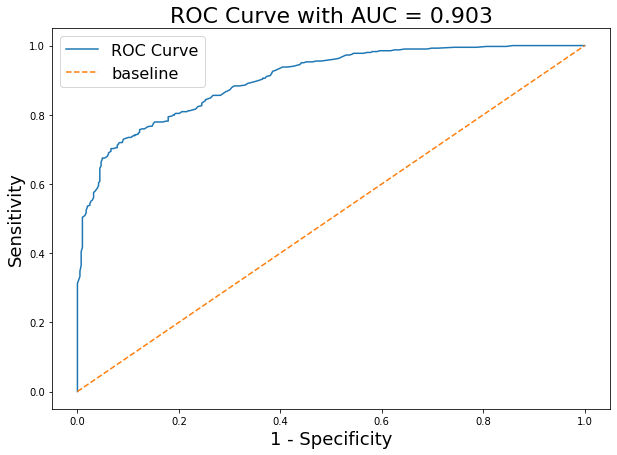

In [57]:
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

In [65]:
display = pd.DataFrame()
display

""


In [66]:
display['Model'] = ['LogisticRegression', 
          'MultinomialNB', 
          'DecisionTreeClassifier', 
          'BaggingClassifier', 
          'RandomForestClassifier', 'LogisticRegression', 
          'MultinomialNB', 
          'DecisionTreeClassifier', 
          'BaggingClassifier', 
          'RandomForestClassifier']
display.head()

,Model
0,LogisticRegression
1,MultinomialNB
2,DecisionTreeClassifier
3,BaggingClassifier
4,RandomForestClassifier


In [67]:
display['Transformer'] = ['CountVectorizer',
                         'CountVectorizer',
                         'CountVectorizer',
                         'CountVectorizer',
                         'CountVectorizer',
                         'TfidfVectorizer',
                         'TfidfVectorizer',
                         'TfidfVectorizer',
                         'TfidfVectorizer',
                         'TfidfVectorizer']

In [68]:
res_disp = results_stem.drop(columns=['Model', 'Vectorizer'])

In [69]:
display_results = pd.concat([display, res_disp], axis = 1)
display_results

,Model,Transformer,Training Score,Testing Score,Sensitivity,Specificity,False Positive Rate,Accuracy,Misclassification Rate,ROC AUC Score
0,LogisticRegression,CountVectorizer,0.943,0.804,0.782,0.826,0.174,0.804,0.196,0.903
1,MultinomialNB,CountVectorizer,0.865,0.790,0.680,0.900,0.100,0.790,0.210,0.890
2,DecisionTreeClassifier,CountVectorizer,0.995,0.822,0.789,0.855,0.145,0.822,0.178,0.831
3,BaggingClassifier,CountVectorizer,0.976,0.811,0.754,0.868,0.132,0.811,0.189,0.900
4,RandomForestClassifier,CountVectorizer,0.986,0.808,0.757,0.858,0.142,0.808,0.192,0.897
5,LogisticRegression,TfidfVectorizer,0.902,0.813,0.752,0.873,0.127,0.813,0.187,0.904
6,MultinomialNB,TfidfVectorizer,0.880,0.797,0.707,0.885,0.115,0.797,0.203,0.891
7,DecisionTreeClassifier,TfidfVectorizer,0.970,0.787,0.782,0.792,0.208,0.787,0.213,0.799
8,BaggingClassifier,TfidfVectorizer,0.967,0.795,0.725,0.865,0.135,0.795,0.205,0.874
9,RandomForestClassifier,TfidfVectorizer,0.978,0.793,0.744,0.841,0.159,0.793,0.207,0.871


Since we are optimizing over sensitivity (true positive rate) so sorting display df by the 'Sensitivity' column, from highest to lowest. 

In [ ]:
display.sort_values(by = 'Sensitivity', ascending = False, inplace=True)
display

In [30]:
X = df['user_text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state=42)

In [31]:
results = multi_pipe(vectorizers, models)
results

,Model,Vectorizer,Training Score,Testing Score,Sensitivity,Specificity,False Positive Rate,Accuracy,Misclassification Rate,ROC AUC Score
0,"(CountVectorizer(analyzer='word', binary=False...","CountVectorizer(analyzer='word', binary=False,...",0.974,0.777,0.680,0.870,0.130,0.777,0.223,0.857
1,"(CountVectorizer(analyzer='word', binary=False...","CountVectorizer(analyzer='word', binary=False,...",0.882,0.777,0.650,0.898,0.102,0.777,0.223,0.856
2,"(CountVectorizer(analyzer='word', binary=False...","CountVectorizer(analyzer='word', binary=False,...",0.994,0.739,0.631,0.843,0.157,0.739,0.261,0.762
3,"(CountVectorizer(analyzer='word', binary=False...","CountVectorizer(analyzer='word', binary=False,...",0.984,0.720,0.621,0.815,0.185,0.720,0.280,0.783
4,"(CountVectorizer(analyzer='word', binary=False...","CountVectorizer(analyzer='word', binary=False,...",0.974,0.758,0.631,0.880,0.120,0.758,0.242,0.824
5,"(TfidfVectorizer(analyzer='word', binary=False...","TfidfVectorizer(analyzer='word', binary=False,...",0.904,0.782,0.641,0.917,0.083,0.782,0.218,0.852
6,"(TfidfVectorizer(analyzer='word', binary=False...","TfidfVectorizer(analyzer='word', binary=False,...",0.813,0.763,0.631,0.889,0.111,0.763,0.237,0.828
7,"(TfidfVectorizer(analyzer='word', binary=False...","TfidfVectorizer(analyzer='word', binary=False,...",0.978,0.749,0.641,0.852,0.148,0.749,0.251,0.755
8,"(TfidfVectorizer(analyzer='word', binary=False...","TfidfVectorizer(analyzer='word', binary=False,...",0.969,0.730,0.602,0.852,0.148,0.730,0.270,0.780
9,"(TfidfVectorizer(analyzer='word', binary=False...","TfidfVectorizer(analyzer='word', binary=False,...",0.978,0.758,0.621,0.889,0.111,0.758,0.242,0.801


In [32]:
results

,Model,Vectorizer,Training Score,Testing Score,Sensitivity,Specificity,False Positive Rate,Accuracy,Misclassification Rate,ROC AUC Score
0,"(CountVectorizer(analyzer='word', binary=False...","CountVectorizer(analyzer='word', binary=False,...",0.974,0.777,0.680,0.870,0.130,0.777,0.223,0.857
1,"(CountVectorizer(analyzer='word', binary=False...","CountVectorizer(analyzer='word', binary=False,...",0.882,0.777,0.650,0.898,0.102,0.777,0.223,0.856
2,"(CountVectorizer(analyzer='word', binary=False...","CountVectorizer(analyzer='word', binary=False,...",0.994,0.739,0.631,0.843,0.157,0.739,0.261,0.762
3,"(CountVectorizer(analyzer='word', binary=False...","CountVectorizer(analyzer='word', binary=False,...",0.984,0.720,0.621,0.815,0.185,0.720,0.280,0.783
4,"(CountVectorizer(analyzer='word', binary=False...","CountVectorizer(analyzer='word', binary=False,...",0.974,0.758,0.631,0.880,0.120,0.758,0.242,0.824
5,"(TfidfVectorizer(analyzer='word', binary=False...","TfidfVectorizer(analyzer='word', binary=False,...",0.904,0.782,0.641,0.917,0.083,0.782,0.218,0.852
6,"(TfidfVectorizer(analyzer='word', binary=False...","TfidfVectorizer(analyzer='word', binary=False,...",0.813,0.763,0.631,0.889,0.111,0.763,0.237,0.828
7,"(TfidfVectorizer(analyzer='word', binary=False...","TfidfVectorizer(analyzer='word', binary=False,...",0.978,0.749,0.641,0.852,0.148,0.749,0.251,0.755
8,"(TfidfVectorizer(analyzer='word', binary=False...","TfidfVectorizer(analyzer='word', binary=False,...",0.969,0.730,0.602,0.852,0.148,0.730,0.270,0.780
9,"(TfidfVectorizer(analyzer='word', binary=False...","TfidfVectorizer(analyzer='word', binary=False,...",0.978,0.758,0.621,0.889,0.111,0.758,0.242,0.801


### Right now, our best model is CountVectorizer on Logistic Regression using the cleaned and stemmed text data.

### Baseline Model 

In [75]:
# Baseline accuracy to tell if our model is better than null model
y_test.value_counts(normalize=True)

0    0.503083
1    0.496917
Name: target, dtype: float64